In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import do DS e Entendimento dos Dados

In [2]:
dados=pd.read_csv(r'C:\Users\breno\OneDrive\Área de Trabalho\Cursos e Estudos\Estudos\Regression_CarPrice\CarPrice_Assignment.csv')

In [3]:
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dados.drop(columns='car_ID',inplace=True)

In [5]:
dados.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 2. Análise das variáveis e suas relações

Text(0.5, 0, 'Preços')

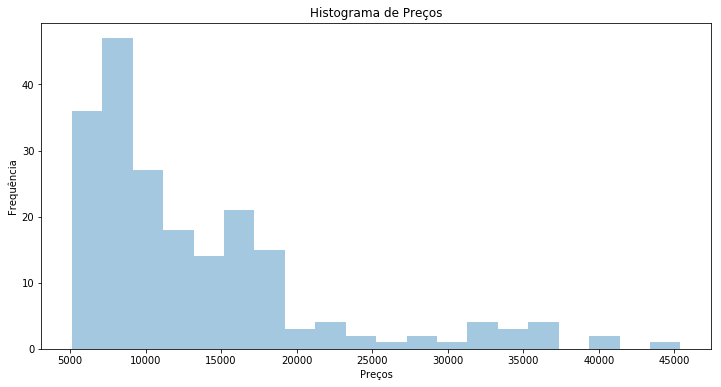

In [6]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.distplot(dados.price,norm_hist=False,kde=False,bins=20)
ax.set_title('Histograma de Preços')
ax.set_ylabel('Frequência')
ax.set_xlabel('Preços')

Text(0.5, 0, 'Preços')

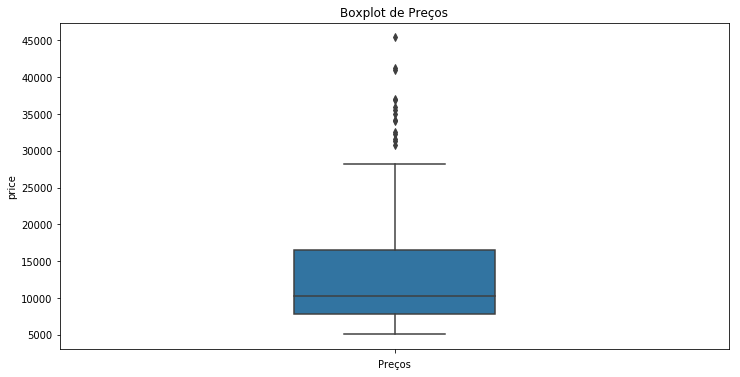

In [7]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(dados.price,width=0.3,orient='v')
ax.set_title('Boxplot de Preços')
ax.set_xlabel('Preços')

<B> Vemos que temos muitos outliers para essa distribuição. Não iremos considerar por enquanto os outliers

In [8]:
#Query para retirar os outliers para otimização do modelo
dados_outliers=dados.query('price < 30000')

Text(0.5, 0, 'Preços')

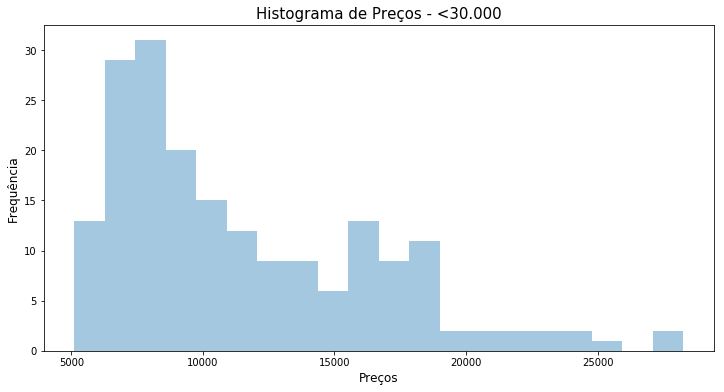

In [9]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.distplot(dados_outliers.price,norm_hist=False,kde=False,bins=20)
ax.set_title('Histograma de Preços - <30.000',fontsize=15)
ax.set_ylabel('Frequência',fontsize=12)
ax.set_xlabel('Preços',fontsize=12)

Text(0.5, 0, 'Preços')

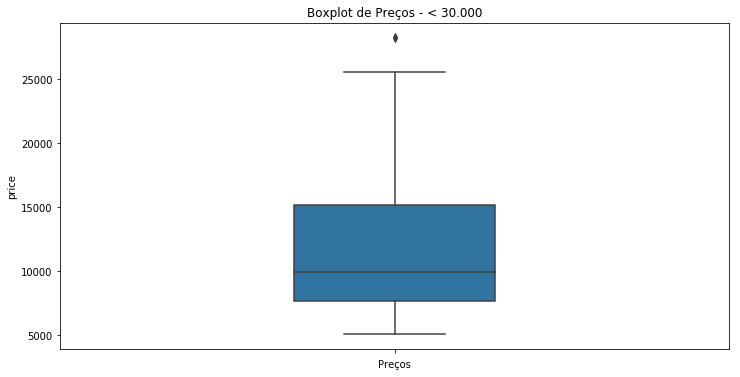

In [10]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(dados_outliers.price,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Preços')

Text(0.5, 0, 'Preços')

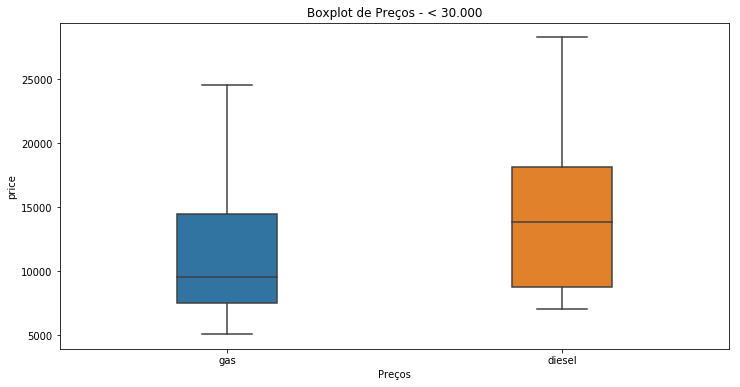

In [11]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(y=dados_outliers.price,x=dados_outliers.fueltype,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Preços')

In [12]:
dados_object = dados_outliers.select_dtypes(include='object')
dados_numerical = dados_outliers.select_dtypes(exclude='object')

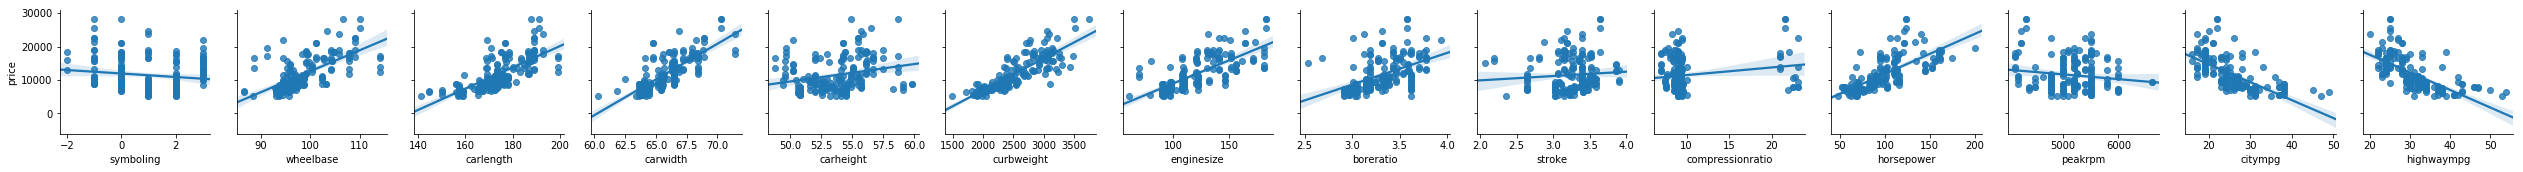

In [13]:
sns.pairplot(dados_numerical,kind='reg',y_vars=['price'],x_vars=['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg'])

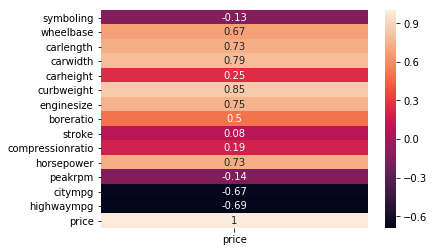

In [14]:
sns.heatmap(dados_numerical.corr().round(2)[['price']],annot=True)

In [15]:
dados_object.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [16]:
print(dados.fueltype.unique())
print(dados.aspiration.unique())
print(dados.doornumber.unique())
print(dados.carbody.unique())
print(dados.drivewheel.unique())
print(dados.enginelocation.unique())
print(dados.enginetype.unique())
print(dados.cylindernumber.unique())
print(dados.fuelsystem.unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


<B> Alguns dados podem ser substituidos por numeros e as análises das variáveis numéricas pode ter alterações

In [17]:
numbers_dict = {
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'eight':8,
    'twelve':12
}

In [18]:
dados_outliers['doornumber']=dados_outliers['doornumber'].map(numbers_dict)

c:\Users\breno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
dados_outliers['cylindernumber']=dados_outliers['cylindernumber'].map(numbers_dict)

c:\Users\breno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
dados_numerical_2 = dados_outliers.select_dtypes(exclude='object')

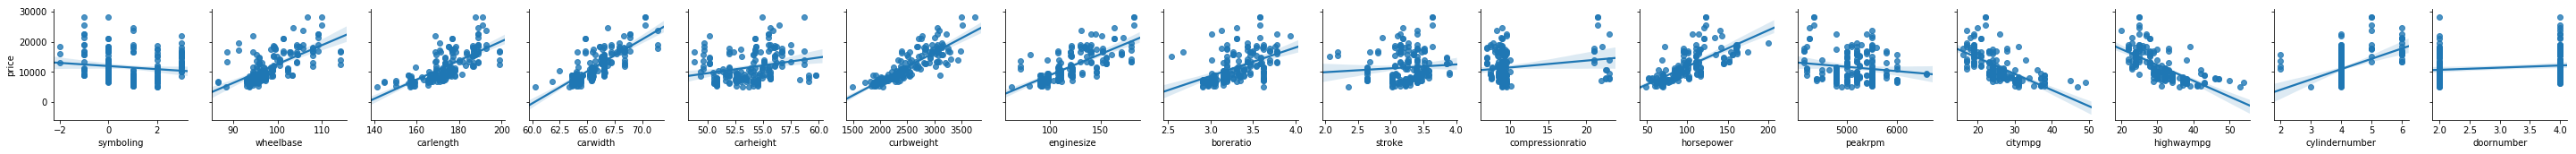

In [21]:
sns.pairplot(dados_numerical_2,kind='reg',y_vars=['price'],x_vars=['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'cylindernumber',
 'doornumber'])

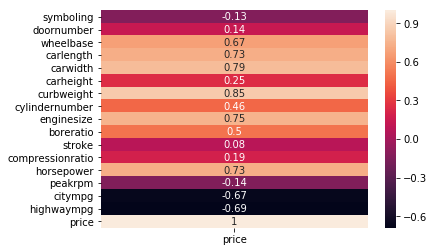

In [22]:
sns.heatmap(dados_numerical_2.corr().round(2)[['price']],annot=True)

Text(0, 0.5, 'Preços')

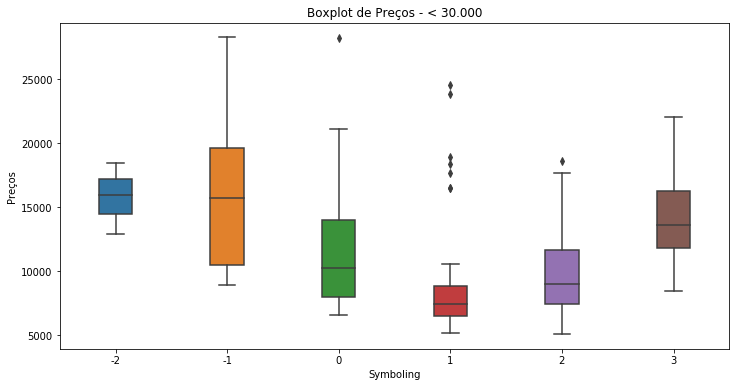

In [23]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(y=dados_numerical_2.price,x=dados_numerical_2.symboling,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Symboling')
ax.set_ylabel('Preços')

<b> A variável symboling tem diferenças entre sí para os preços ?

Text(0, 0.5, 'Preços')

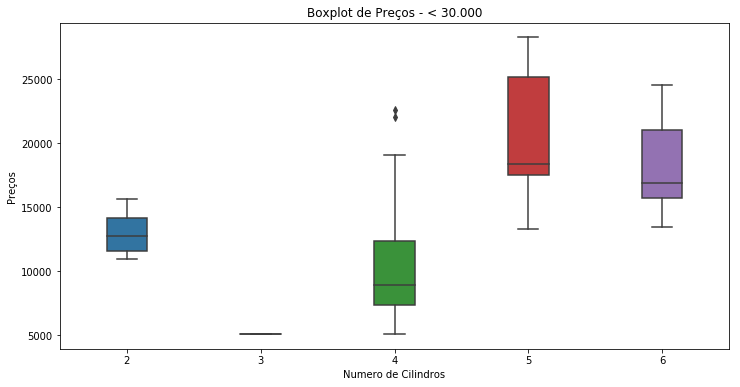

In [24]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(y=dados_numerical_2.price,x=dados_numerical_2.cylindernumber,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Numero de Cilindros')
ax.set_ylabel('Preços')

<b> existe diferença entre a quantidade de cilíndros ?

In [25]:
dados_numerical_2['compressionratio_bins']= dados_numerical_2['compressionratio'].apply(lambda x:0 if x<=15 else 1 )

c:\Users\breno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Preços')

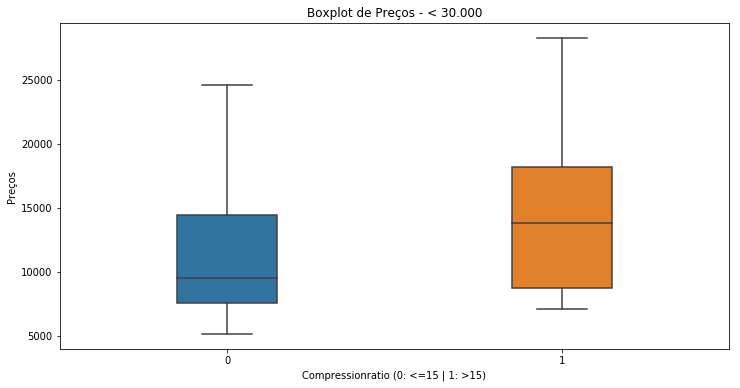

In [26]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(y=dados_numerical_2.price,x=dados_numerical_2.compressionratio_bins,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Compressionratio (0: <=15 | 1: >15)')
ax.set_ylabel('Preços')

<b> Existem diferenças entre os compressionratios ?

In [27]:
dados_object_2 = dados_outliers.select_dtypes(include='object')

In [28]:
dados_object_2['price']=dados_numerical_2['price']

c:\Users\breno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
dados_object_2.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,price
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,13495.0
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,16500.0
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,16500.0
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,13950.0
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,17450.0


Text(0.5, 0, '')

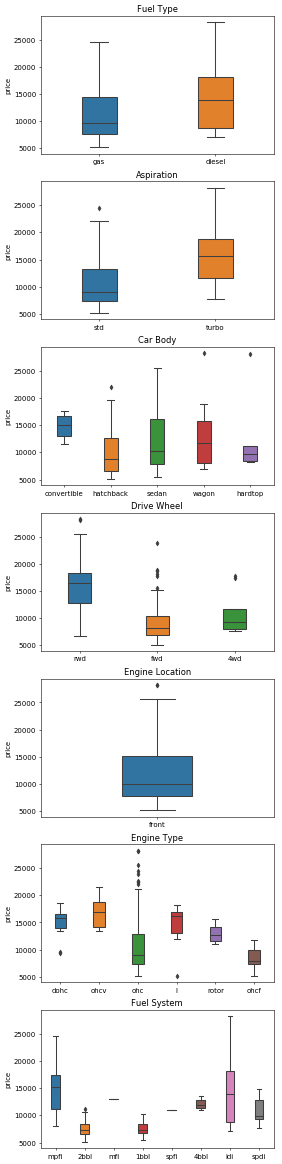

In [30]:
fig,axs = plt.subplots(7,figsize=(6,30),dpi=50)

axs[0]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.fueltype,width=0.3,orient='v',ax=axs[0])
axs[0].set_title('Fuel Type')
axs[0].set_xlabel('')

axs[1]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.aspiration,width=0.3,orient='v',ax=axs[1])
axs[1].set_title('Aspiration')
axs[1].set_xlabel('')

axs[2]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.carbody,width=0.3,orient='v',ax=axs[2])
axs[2].set_title('Car Body')
axs[2].set_xlabel('')

axs[3]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.drivewheel,width=0.3,orient='v',ax=axs[3])
axs[3].set_title('Drive Wheel')
axs[3].set_xlabel('')

axs[4]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.enginelocation,width=0.3,orient='v',ax=axs[4])
axs[4].set_title('Engine Location')
axs[4].set_xlabel('')

axs[5]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.enginetype,width=0.3,orient='v',ax=axs[5])
axs[5].set_title('Engine Type')
axs[5].set_xlabel('')

axs[6]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.fuelsystem,width=0.3,orient='v',ax=axs[6])
axs[6].set_title('Fuel System')
axs[6].set_xlabel('')

Text(0.5, 0, '')

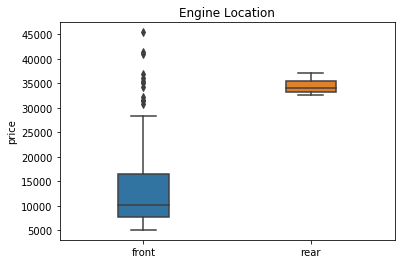

In [31]:
ax=sns.boxplot(y=dados.price,x=dados.enginelocation,width=0.3,orient='v')
ax.set_title('Engine Location')
ax.set_xlabel('')

In [32]:
dados_object_2.fuelsystem.value_counts()

mpfi    80
2bbl    66
idi     19
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

<B> Fuel Type, Aspirantion, Car Body:</b> Conferir se há diferença <br />
<B>Drive Wheel, Engine Type :</b> Tem muitos outliers. Conferir se há diferença, se houver, testar modelo sem e com <br />
<b>Engine Location: </b> Considerar apenas para quando for feita a análise com outliers <br />
<B> Fuel System: </b> Alguns tipos possuem poucos dados, vale a pena manter ?

# 3. Analises Estatisticas e Testes de Hipótese (Desconsiderando outliers)

<b> Testes a serem considerados: </b> <br/> <br/>
<b> VARIÁVEIS NUMÉRICAS </B> <BR/><br/>
<b>cylindernumber:</b> Conferir se há diferença entre eles <br/>
<b>compressionratio_bins:</b> Conferir se há diferença entre eles <br/> <br/>
<b> VARIÁVEIS CATEGORICAS </B> <BR/> <BR/>
<B> Fuel Type, Aspirantion, Car Body:</b> Conferir se há diferença <br />
<B>Drive Wheel, Engine Type :</b> Tem muitos outliers. Conferir se há diferença, se houver, testar modelo sem e com <br />
<b>Engine Location: </b> Considerar apenas para quando for feita a análise com outliers <br />
<B> Fuel System: </b> Alguns tipos possuem poucos dados, vale a pena manter ?

In [33]:
#DataFrames
#dados_outliers
#dados_object_2
#dados_numerical_2

In [34]:
from scipy.stats import normaltest

In [35]:
normaltest(dados_outliers.price)

NormaltestResult(statistic=27.23132568647702, pvalue=1.2212167706681285e-06)

Não são dados normais, será utilizado o ranksums()

In [36]:
from scipy.stats import ranksums

alternative{‘two-sided’, ‘less’, ‘greater’}, optional
Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:

‘two-sided’: one of the distributions (underlying x or y) is stochastically greater than the other.

‘less’: the distribution underlying x is stochastically less than the distribution underlying y.

‘greater’: the distribution underlying x is stochastically greater than the distribution underlying y.

## 3.1. Variáveis Numéricas

### 3.1.1 Cylinder Number

In [37]:
from scipy.stats import ranksums

In [38]:
dados_numerical_2.cylindernumber.unique()

array([4, 6, 5, 3, 2], dtype=int64)

In [39]:
cylinder_2 = dados_numerical_2.query('cylindernumber==2').price
cylinder_3 = dados_numerical_2.query('cylindernumber==3').price
cylinder_4 = dados_numerical_2.query('cylindernumber==4').price
cylinder_5 = dados_numerical_2.query('cylindernumber==5').price
cylinder_6 = dados_numerical_2.query('cylindernumber==6').price

In [40]:
dict_hipoteses = {
    2:cylinder_2,
    3:cylinder_3,
    4:cylinder_4,
    5:cylinder_5,
    6:cylinder_6
}

In [41]:
list_hipoteses = list()
list_response = list()
for i in range(2,7,1):
    for j in range(2,7,1):
        _,p = ranksums(dict_hipoteses[i],dict_hipoteses[j])
        list_hipoteses.append(round(p,3))
    list_response.append(list_hipoteses[:])
    list_hipoteses.clear()
df_hipoteses=pd.DataFrame(list_response)
df_hipoteses.columns = range(2,7,1)
df_hipoteses.index=range(2,7,1)
df_hipoteses.head()

,2,3,4,5,6
2,1.000,0.157,0.072,0.016,0.011
3,0.157,1.000,0.089,0.114,0.102
4,0.072,0.089,1.000,0.000,0.000
5,0.016,0.114,0.000,1.000,0.225
6,0.011,0.102,0.000,0.225,1.000


# 4. Regressões

In [42]:
dados_outliers.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
from sklearn.model_selection import train_test_split

## 4.1. Tratamento da base

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [46]:
df_consolidate_object = dados_object_2[['price']]
df_consolidate_object = df_consolidate_object.reset_index()
df_consolidate_object.drop(columns='index',inplace=True)
def hotenconding(df,col):
    global df_consolidate_object
    df_encoder=pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
    type_column=df[col].unique().tolist()
    df_encoder.columns = sorted(type_column)
    df_consolidate_object=df_consolidate_object.join(df_encoder)

In [47]:
hotenconding(dados_object_2,'fueltype')
hotenconding(dados_object_2,'aspiration')
hotenconding(dados_object_2,'carbody')
hotenconding(dados_object_2,'drivewheel')
hotenconding(dados_object_2,'enginelocation')
hotenconding(dados_object_2,'enginetype')
hotenconding(dados_object_2,'fuelsystem')

In [48]:
df_consolidate_object.head(10)

,price,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,13495.000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,16500.000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,16500.000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13950.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,17450.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,15250.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,17710.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,18920.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,23875.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,17859.167,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
dados_numerical_2 = dados_numerical_2.reset_index()
dados_numerical_2.drop(columns=['index','compressionratio_bins'],inplace=True)

In [50]:
dados_numerical_2.drop(columns='price',inplace=True)

In [51]:
dados_regression = df_consolidate_object.join(dados_numerical_2)

In [52]:
dados_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             190 non-null    float64
 1   diesel            190 non-null    float64
 2   gas               190 non-null    float64
 3   std               190 non-null    float64
 4   turbo             190 non-null    float64
 5   convertible       190 non-null    float64
 6   hardtop           190 non-null    float64
 7   hatchback         190 non-null    float64
 8   sedan             190 non-null    float64
 9   wagon             190 non-null    float64
 10  4wd               190 non-null    float64
 11  fwd               190 non-null    float64
 12  rwd               190 non-null    float64
 13  front             190 non-null    float64
 14  dohc              190 non-null    float64
 15  l                 190 non-null    float64
 16  ohc               190 non-null    float64
 1

## 4.2. Regressão Principal

In [53]:
y=dados_regression['price']

In [54]:
X= dados_regression[dados_regression.drop(columns='price').columns.to_list()]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
modelo=LinearRegression()

In [58]:
modelo.fit(X_train,y_train)

LinearRegression()

In [59]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.92


In [60]:
y_previsto = modelo.predict(X_test)

In [61]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = -3.4849121008918516e+16


In [97]:
parametros = pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_),columns=['Parâmetros'])
parametros.index=['intercept',
 'diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'front',
 'dohc',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 '1bbl',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi',
 'symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [101]:
parametros['Parâmetros'].sort_values(ascending=False)

diesel              3.849028e+13
gas                 1.749558e+13
1bbl                3.499116e+12
2bbl                3.499116e+12
mpfi                3.499116e+12
mfi                 3.499116e+12
spdi                3.499116e+12
rotor               7.363971e+03
cylindernumber      2.654112e+03
boreratio           2.428642e+03
convertible         1.772887e+03
ohc                 1.659639e+03
rwd                 1.233812e+03
turbo               1.126772e+03
carwidth            7.927605e+02
symboling           4.236415e+02
sedan               2.660703e+02
highwaympg          2.651549e+02
compressionratio    1.845657e+02
doornumber          1.635220e+02
wheelbase           1.548633e+02
wagon               1.140669e+02
horsepower          4.721310e+01
curbweight          1.927734e+00
front               3.027344e-02
4bbl                1.953125e-03
spfi               -2.441406e-04
peakrpm            -3.515625e-01
carheight          -2.563199e+00
enginesize         -7.048462e+00
carlength 

In [63]:
y_previsto_train = modelo.predict(X_train)

In [64]:
print('R² = %s' % metrics.r2_score(y_train, y_previsto_train).round(2))

R² = 0.92


In [78]:
df_diferença_train = pd.DataFrame(data=y_previsto_train)

In [79]:
df_diferença_train.head()

,0
0,6736.410156
1,9426.058594
2,7915.718750
3,6805.628906
4,16063.648438


<b> Conclusão: Considerar dados sem os outliers retirou vários dados do dataset, e isso influenciou no modelo, que está com um R² negativo. São 2 hipóteses: <br/>
1. Dataset Pequeno <br/>
2. O modelo linear não representa esse conjunto de dados

In [84]:
y_train=y_train.reset_index()
y_train.drop(columns='index',inplace=True)
y_train

,price
0,6095.0
1,7957.0
2,8358.0
3,5118.0
4,15580.0
...,...
128,6855.0
129,14489.0
130,7689.0
131,7499.0


In [85]:
df_diferença_train = df_diferença_train.join(y_train)

In [86]:
df_diferença_train

,0,price
0,6736.410156,6095.0
1,9426.058594,7957.0
2,7915.718750,8358.0
3,6805.628906,5118.0
4,16063.648438,15580.0
...,...,...
128,6958.367188,6855.0
129,13285.734375,14489.0
130,8282.585938,7689.0
131,6872.050781,7499.0


In [87]:
df_diferença_train.columns = ['y_previsto','y_treino']

In [88]:
df_diferença_train['diferença'] = df_diferença_train['y_treino']-df_diferença_train['y_previsto']

Text(0.5, 1.0, 'Dispersão de Resíduos')

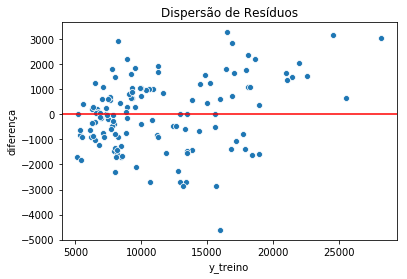

In [92]:
ax,fig=plt.subplots()
ax = sns.scatterplot(x='y_treino',y='diferença',data=df_diferença_train)
plt.axhline(y=df_diferença_train.diferença.mean(), color='r')
ax.set_title('Dispersão de Resíduos')

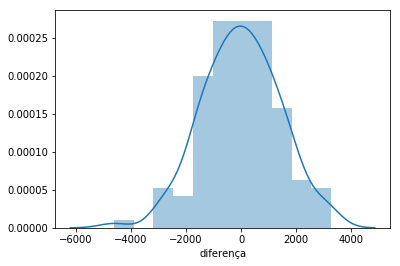

In [102]:
sns.distplot(df_diferença_train.diferença)

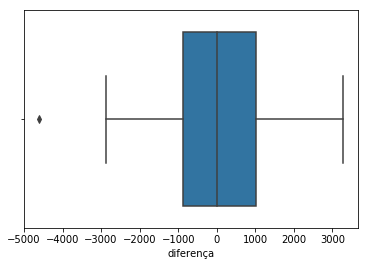

In [94]:
sns.boxplot(df_diferença_train.diferença)

## 4.3. Regressão com outliers

In [103]:
dados.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [104]:
dados['cylindernumber']=dados['cylindernumber'].map(numbers_dict)
dados['doornumber']=dados['doornumber'].map(numbers_dict)

In [105]:
dados.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [106]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [113]:
dados_object_3 = dados.select_dtypes(include='object')
dados_numerical_3 = dados.select_dtypes(exclude='object')
dados_numerical_3.drop(columns='price',inplace=True)

c:\Users\breno\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [114]:
df_consolidate_object = dados[['price']]
df_consolidate_object = df_consolidate_object.reset_index()
df_consolidate_object.drop(columns='index',inplace=True)

In [115]:
hotenconding(dados_object_3,'fueltype')
hotenconding(dados_object_3,'aspiration')
hotenconding(dados_object_3,'carbody')
hotenconding(dados_object_3,'drivewheel')
hotenconding(dados_object_3,'enginelocation')
hotenconding(dados_object_3,'enginetype')
hotenconding(dados_object_3,'fuelsystem')

In [116]:
df_consolidate_object

,price,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,13495.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,16500.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,16500.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13950.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,17450.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,19045.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,21485.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,22470.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [117]:
dados_regression_2 = df_consolidate_object.join(dados_numerical_3)

In [118]:
dados_regression_2

,price,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,...,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,16500.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,16500.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,13950.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,17450.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2824,5,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2952,4,141,3.78,3.15,9.5,114,5400,23,28
201,19045.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3049,4,141,3.78,3.15,8.7,160,5300,19,25
202,21485.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3012,6,173,3.58,2.87,8.8,134,5500,18,23
203,22470.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3217,6,145,3.01,3.40,23.0,106,4800,26,27


In [119]:
dados_regression_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             205 non-null    float64
 1   diesel            205 non-null    float64
 2   gas               205 non-null    float64
 3   std               205 non-null    float64
 4   turbo             205 non-null    float64
 5   convertible       205 non-null    float64
 6   hardtop           205 non-null    float64
 7   hatchback         205 non-null    float64
 8   sedan             205 non-null    float64
 9   wagon             205 non-null    float64
 10  4wd               205 non-null    float64
 11  fwd               205 non-null    float64
 12  rwd               205 non-null    float64
 13  front             205 non-null    float64
 14  rear              205 non-null    float64
 15  dohc              205 non-null    float64
 16  dohcv             205 non-null    float64
 1

In [120]:
y=dados_regression_2['price']
X= dados_regression_2[dados_regression_2.drop(columns='price').columns.to_list()]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [122]:
modelo=LinearRegression()

In [123]:
modelo.fit(X_train,y_train)

LinearRegression()

In [124]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.94


In [125]:
y_previsto = modelo.predict(X_test)

In [126]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.87


In [127]:
parametros = pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_),columns=['Parâmetros'])

In [130]:
parametros.index=['Intercept'] + X.columns.to_list()

In [133]:
parametros.sort_values('Parâmetros', ascending=False)

,Parâmetros
Intercept,1.412409e+14
idi,1.235858e+14
rotor,1.152013e+04
rear,5.128145e+03
convertible,2.754976e+03
cylindernumber,1.676810e+03
rwd,1.319706e+03
ohc,1.236250e+03
turbo,8.602377e+02
symboling,4.525861e+02


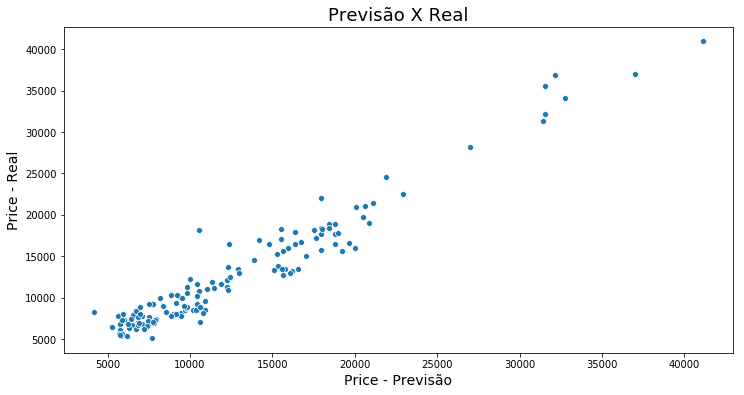

In [135]:
y_previsto_train=modelo.predict(X_train)
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Price - Previsão', fontsize=14)
ax.set_ylabel('Price - Real', fontsize=14)
ax

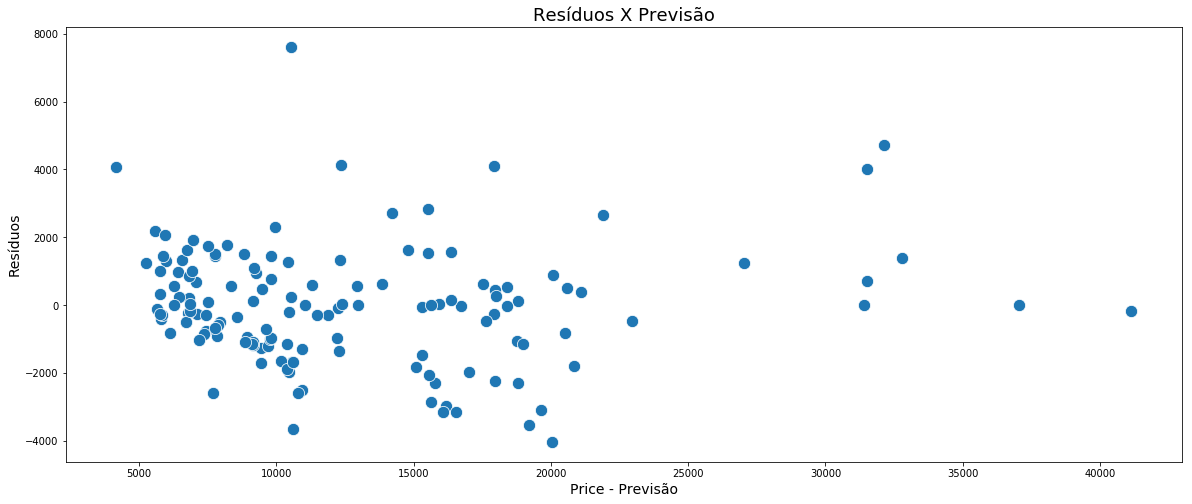

In [136]:
residuo = y_train - y_previsto_train
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Price - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

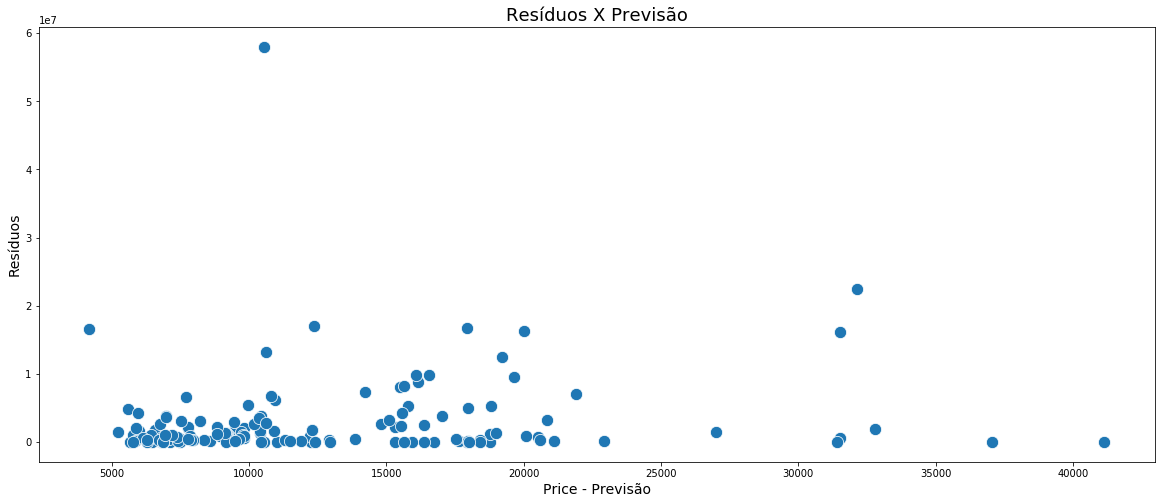

In [137]:
residuo = y_train - y_previsto_train
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Price - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

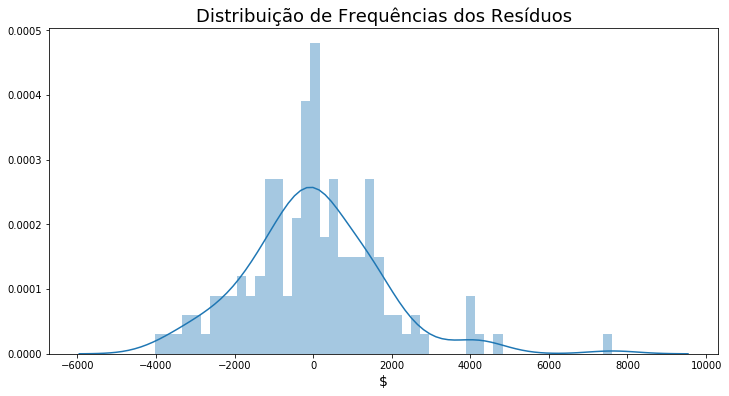

In [139]:
ax = sns.distplot(residuo,bins=50)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('$', fontsize=14)
ax

In [140]:
# Entender como deixar o modelo mais enxuto, e mais preciso.